In [13]:
import torch
import sys
sys.path.append('../')
from DataType.ElectricField import ElectricField
from LightSource.Gaussian_beam import Guassian_beam, VectorialGuassian_beam
from utils.Helper_Functions import normalize
from Props.RSC_Prop import *
from Props.CZT_Prop import *
from utils.units import *
from Addons.Polarization import PolarizationAnalyser

torch.set_default_dtype(torch.float64)

In [14]:
c0 = 2.998e8
f1 = 220e9
f2 = 330e9
wavelength1 = c0 / f1
wavelength2 = c0 / f2

fs = torch.range(f1, f2, 4e9)

wavelengths = c0 / fs
print(wavelengths)

source  = VectorialGuassian_beam(height=200, width=200, 
                        beam_waist_x=10*mm,
                        beam_waist_y=4*mm,
                        jones_vector=[1,-1j],
                        wavelengths=wavelengths, 
                        spacing=[1*mm, 1*mm],
                        alpha=torch.pi/3)

tensor([0.0014, 0.0013, 0.0013, 0.0013, 0.0013, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0010,
        0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0009, 0.0009, 0.0009,
        0.0009])


In [15]:
out = source()

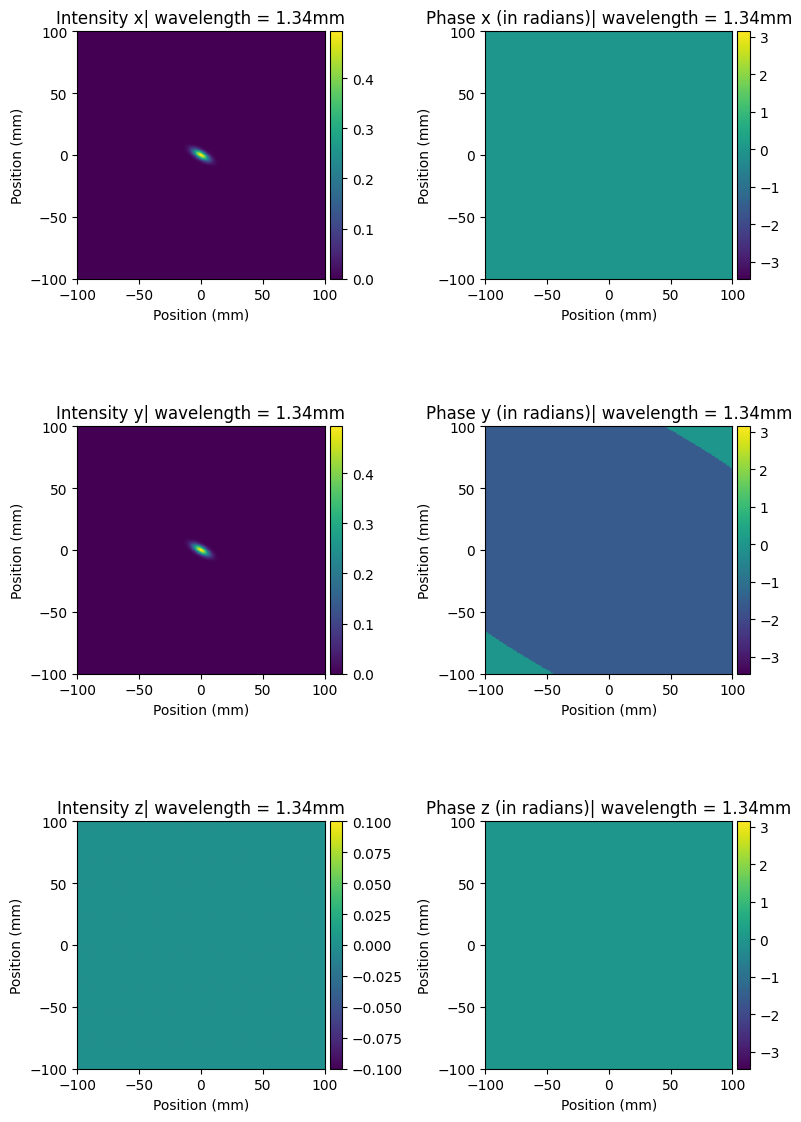

In [16]:
out.visualize(wavelength=wavelengths[1], figsize=(8, 12))

In [17]:
vrs_prop = VRS_prop(z_distance=800 * mm)
field_propagated = vrs_prop.forward(
    field = out
    )

Minimum propagation distance to satisfy energy conservation: 334.776 mm
Minimum propagation distance to satisfy sampling for FT: 389.250 mm
The simulation will be accurate !


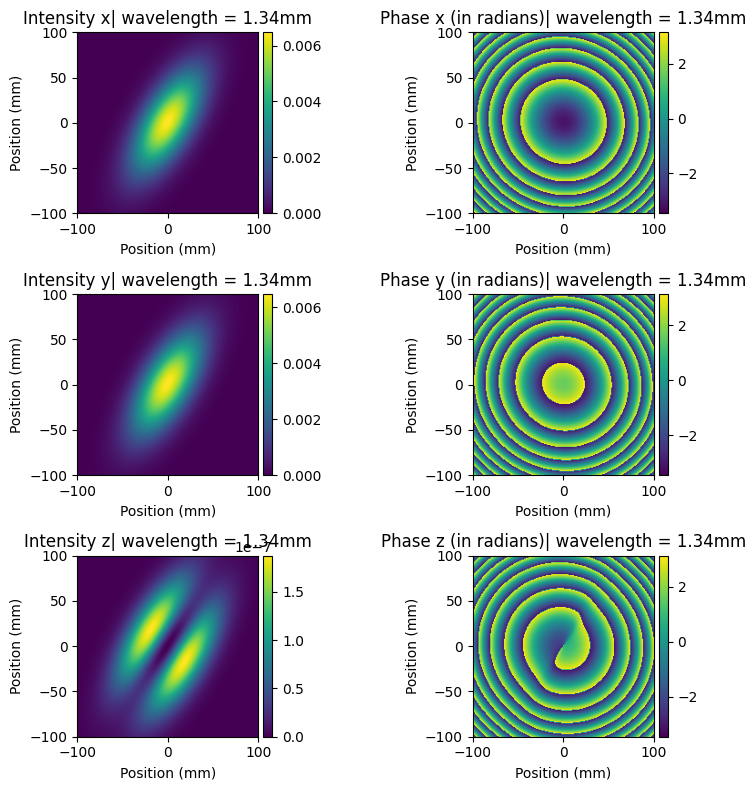

In [18]:
field_propagated.visualize(wavelength=wavelengths[1])

In [19]:
pa = PolarizationAnalyser(field_propagated)

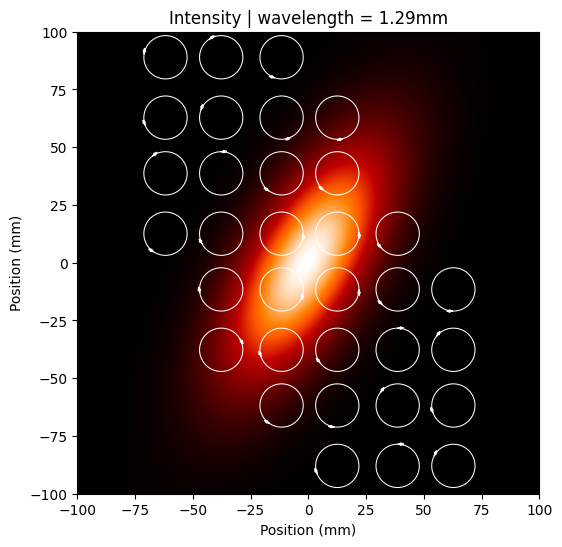

In [20]:
pa.analyze(wavelength=wavelengths[3], figsize=(6, 6), num_ellipses=(8, 8))

In [29]:
wavelengths = 1 * mm


gm = Guassian_beam(height=200, width=200, 
                   beam_waist_x = 2*mm,
                   beam_waist_y = 2*mm,
                   wavelengths=wavelengths, 
                   alpha= 0,
                   spacing=1*mm)
field = gm()
    
asm_prop = RSC_prop(z_distance=500 * mm)
czt_prop = CZT_prop(z_distance=500 * mm)
    
field_propagated = asm_prop.forward(
    field = field
    )

Minimum propagation distance to satisfy energy conservation: 283.552 mm
Minimum propagation distance to satisfy sampling for FT: 346.410 mm
The simulation will be accurate !


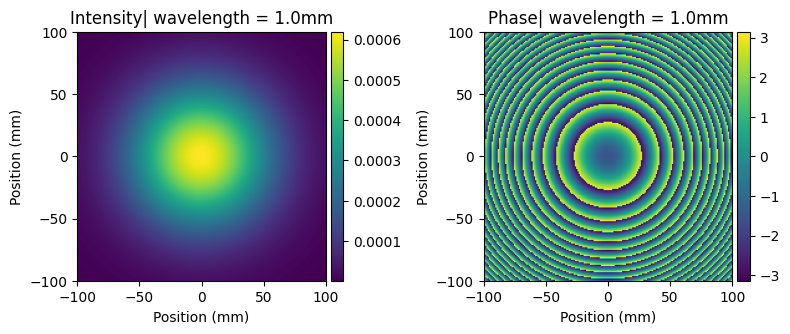

In [30]:
field_propagated.visualize(wavelength=wavelengths)

In [31]:
field_propagated_2 = czt_prop.forward(
    field = field, 
    outputHeight=200,
	outputWidth=200, 						
	outputPixel_dx=1*mm, 
	outputPixel_dy=1*mm,
    )

torch.Size([1, 1, 200, 200])
torch.Size([1, 1, 200, 200])
torch.Size([1, 1, 512, 200])
torch.Size([1, 1, 512, 200])
torch.Size([1, 1, 512, 200])
tensor([[[[0.4005, 0.4015, 0.4025, 0.4035, 0.4045, 0.4055, 0.4065, 0.4075,
           0.4085, 0.4095, 0.4105, 0.4115, 0.4125, 0.4135, 0.4145, 0.4155,
           0.4165, 0.4175, 0.4185, 0.4195, 0.4205, 0.4215, 0.4225, 0.4235,
           0.4245, 0.4255, 0.4265, 0.4275, 0.4285, 0.4295, 0.4305, 0.4315,
           0.4325, 0.4335, 0.4345, 0.4355, 0.4365, 0.4375, 0.4385, 0.4395,
           0.4405, 0.4415, 0.4425, 0.4435, 0.4445, 0.4455, 0.4465, 0.4475,
           0.4485, 0.4495, 0.4505, 0.4515, 0.4525, 0.4535, 0.4545, 0.4555,
           0.4565, 0.4575, 0.4585, 0.4595, 0.4605, 0.4615, 0.4625, 0.4635,
           0.4645, 0.4655, 0.4665, 0.4675, 0.4685, 0.4695, 0.4705, 0.4715,
           0.4725, 0.4735, 0.4745, 0.4755, 0.4765, 0.4775, 0.4785, 0.4795,
           0.4805, 0.4815, 0.4825, 0.4835, 0.4845, 0.4855, 0.4865, 0.4875,
           0.4885, 0.4895, 0.4

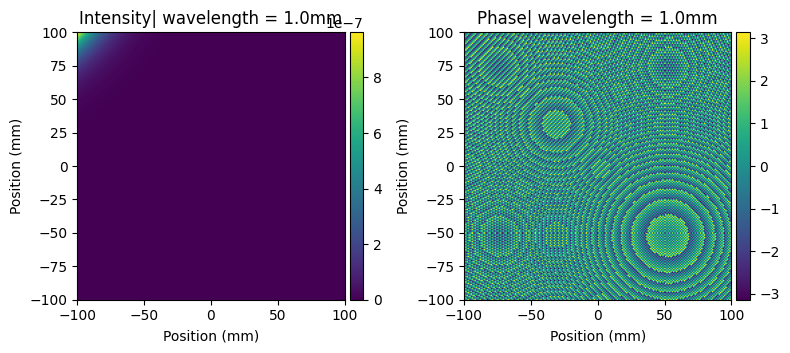

In [33]:
field_propagated_2.visualize(wavelength=wavelengths)

In [34]:
field_propagated.shape

torch.Size([1, 1, 200, 200])